<a href="https://colab.research.google.com/github/KryssyCo/DS-Unit-2-Kaggle-Challenge/blob/master/Krista_Shepard_DSPT2_U2S6M1_Assignment_1_Kaggle_Challenge_Attempt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [X] Do train/validate/test split with the Tanzania Waterpumps data.
- [X] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [X] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [X] Get your validation accuracy score.
- [X] Get and plot your feature importances.
- [X] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [X] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [0]:
# If you're in Colab...
import os, sys

    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

### 1. Do train/validate/test split with the Tanzania Waterpumps data.

In [0]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                    stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

## 2. Define a function to wrangle train, validate, and test sets in the same way. 

##Clean outliers and engineer features. 
Completed
## For example what other columns have zeros and shouldn't? 
Addressed in wrangling code.
## What other columns are duplicates, or nearly duplicates? 
Addressed in wrangling code. 
## Can you extract the year from date_recorded? 
Yes
## Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?
 I tried assuming the inspection date was the date_recorded, I tried to engineer a feature that would subtract the construction date from the date_recorded.
 
As a second engineered feature, I attempted to append 3 columns but ran into a blocker 

I will address both in 1:1

In [0]:
import numpy as np
# import pandas_profiling as pp
# pp.ProfileReport(train)

In [0]:
def wrangle(X):
  X = X.copy()

# Get rid of null island
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

# Dropping duplicate features
  X = X.drop(columns = ['quantity_group', 'payment_type', 'recorded_by',
                      'waterpoint_type', 'source_type', 'quality_group'])

# Change date recorded to date time format
  X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format = True)
  X['construction_year'] = pd.to_datetime(X['date_recorded'], infer_datetime_format = True)

# Extract year from date time
  X['date_recorded'] = X['date_recorded'].dt.year
  X['construction_year'] = X['construction_year'].dt.year

 # Replacing zeroes with null values
  cols_with_zeroes = ['date_recorded', 'construction_year', 'longitude', 'latitude']
  for col in cols_with_zeroes:
    X[col] = X[col].replace(0, np.nan) 

# For categoricals with missing values fill with 'missing'
  categoricals = X.select_dtypes(exclude='number').columns
  for col in categoricals:
    X[col] = X[col].fillna('missing')

  return X

train = wrangle(train)
val = wrangle(val)
test= wrangle(test)

## My unsuccessful attempts at feature engineering
#train['time_between_install_and_inspect'] = (train['date_recorded'] - train['construction_year'])

# df1 = train['extraction_type']
# df2 = train['extraction_type_group']
# df3 = train['extraction_type_class']
# df2 = df1.append(df2, ignore_index=True, verify_integrity=True)
# df4 = df2.append(df3, ignore_index=True, verify_integrity=True)
# train['extract'] = df4


***Note for discussion in 1:1 - How to combine columns without duplicating the values.***

## 3. Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.

In [0]:
# Define the target
target = 'status_group'

# Get a DF with all train cols except target and id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <=50
categorical_features = cardinality[cardinality <=50].index.tolist()

# Combine the lists
features = numeric_features + categorical_features

In [0]:
# Arrange data into X features matrix and Y vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
# Logistic regression
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline (
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

pipeline.fit(X_train, y_train)

print ('Validation Accuracy', pipeline.score(X_val, y_val))

y_pred = pipeline.predict(X_test)

Validation Accuracy 0.7308080808080808


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler()
model = LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model.fit(X_train_scaled, y_train)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

Validation Accuracy 0.7308080808080808


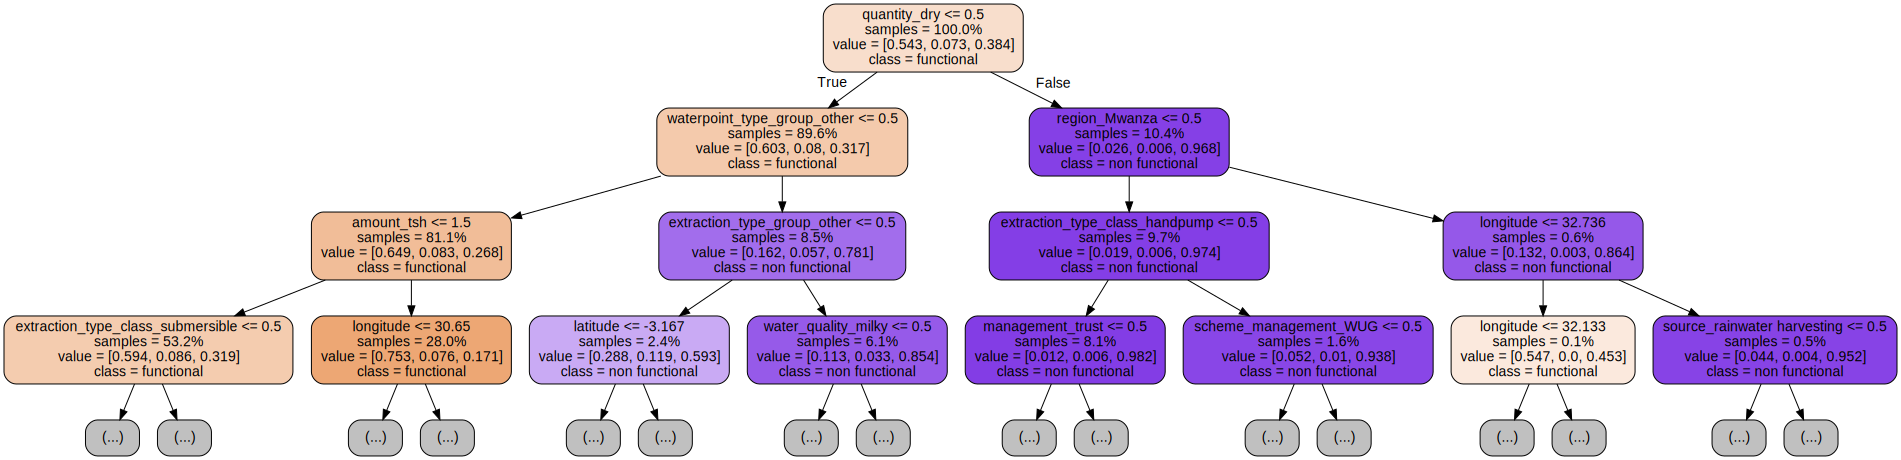

In [0]:
import graphviz
from sklearn.tree import export_graphviz

pipeline = make_pipeline(
    
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=15, random_state=42)

)
pipeline.fit(X_train, y_train)


model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))


## 4. Get your validation accuracy score.

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = make_pipeline(
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=15, random_state=42)
)

dt.fit(train_location, y_train)
print ('Training Accuracy', dt.score(train_location, y_train))
print ('Validation Accuracy', dt.score(val_location, y_val))

Training Accuracy 0.7712962962962963
Validation Accuracy 0.6482323232323233


## 5. Get and plot your feature importances.

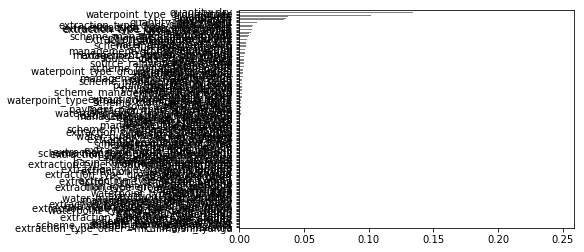

In [0]:
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=15, random_state=42)

)
pipeline.fit(X_train, y_train)

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_train).columns 
importances = pd.Series(model.feature_importances_, encoded_columns)
importances.sort_values().plot.barh(color='grey')

In [0]:
importances.sort_values()

extraction_type_other - mkulima/shinyanga    0.000000
region_Tabora                                0.000000
scheme_management_Private operator           0.000000
scheme_management_Other                      0.000000
scheme_management_Trust                      0.000000
scheme_management_None                       0.000000
extraction_type_gravity                      0.000000
extraction_type_afridev                      0.000000
extraction_type_other - play pump            0.000000
extraction_type_climax                       0.000000
extraction_type_cemo                         0.000000
region_Lindi                                 0.000000
extraction_type_walimi                       0.000000
waterpoint_type_group_cattle trough          0.000000
extraction_type_group_other handpump         0.000000
extraction_type_class_other                  0.000000
extraction_type_class_rope pump              0.000000
extraction_type_class_wind-powered           0.000000
management_company          

## Submit to Kaggle

In [0]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-03.csv', index=False)

In [0]:
from google.colab import files
files.download('submission-03.csv')